In [4]:

# 1. Install & Import Libraries
!pip install kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files



In [5]:


# 2. Load Dataset from Kaggle

files.upload()  # Upload kaggle.json when prompted

# Load dataset
df = pd.read_csv('heart.csv')
print("✅ Dataset Loaded Successfully!")
df.head()



Saving heart.csv to heart.csv
✅ Dataset Loaded Successfully!


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:

# 3. Data Cleaning & Preprocessing

print("\n🔹 Basic Info:")
df.info()

print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Drop duplicates if any

df.drop_duplicates(inplace=True)



🔹 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

🔹 Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
Exercise

In [7]:

# 4. Encode Categorical Variables (Before EDA)

categorical_cols = ['Age', 'Cholesterol', 'ChestPainType']

# Use LabelEncoder for categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("\n✅ Categorical columns encoded successfully!")


✅ Categorical columns encoded successfully!


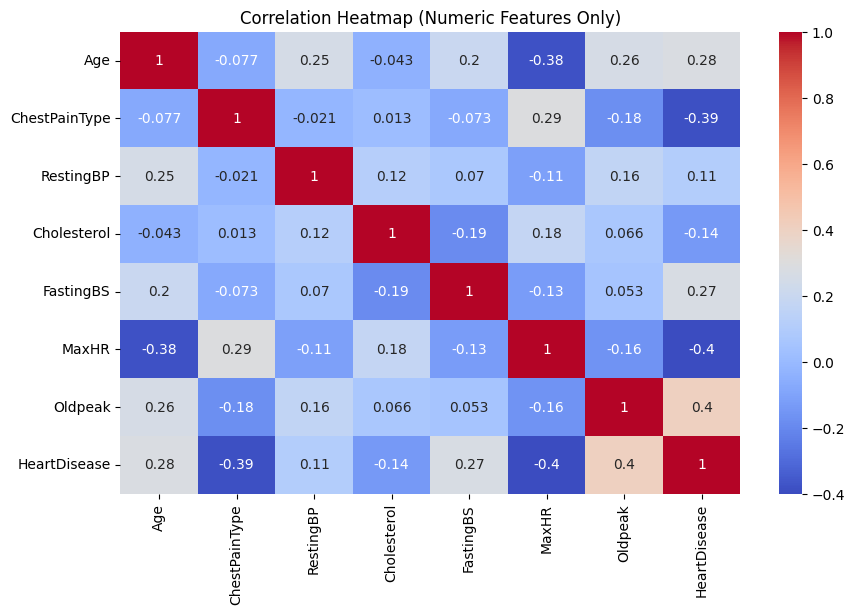

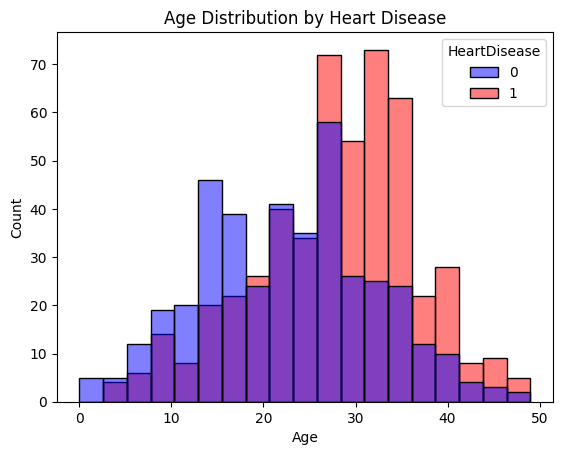

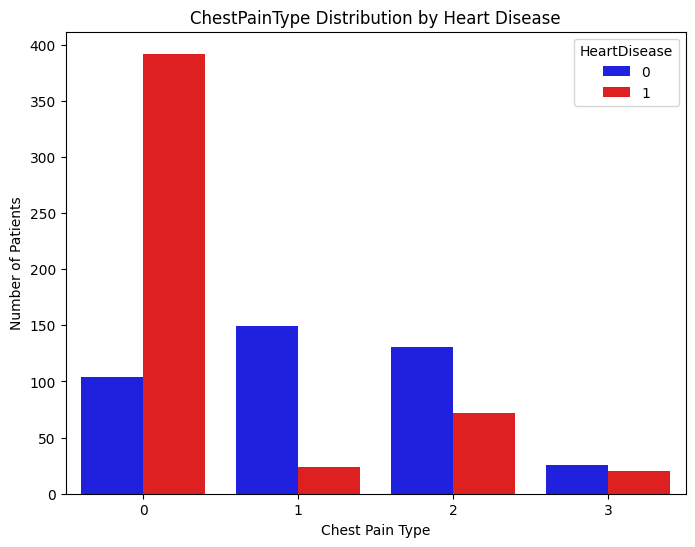

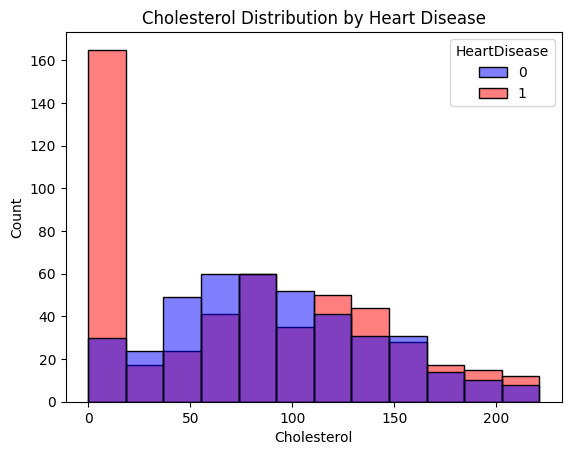

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# Age distribution
sns.histplot(data=df, x='Age', hue='HeartDisease',  palette={0:'blue', 1:'red'})
plt.title('Age Distribution by Heart Disease')
plt.show()

# Chest pain type distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette={0:'blue', 1:'red'})
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Patients")
plt.title("ChestPainType Distribution by Heart Disease")
plt.show()

# Cholesterol distribution
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease',  palette={0:'blue', 1:'red'})
plt.title('Cholesterol Distribution by Heart Disease')
plt.show()


In [14]:
# 6. Feature Scaling
scaler = StandardScaler()
num_cols = ['Age', 'Cholesterol', 'ChestPainType']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [22]:
# 2️⃣ Separate features (X) and target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# 🔧 Encode categorical (non-numeric) columns in X
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':  # check if column contains text
        X[col] = label_encoder.fit_transform(X[col])

# 3️⃣ Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4️⃣ Build and train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!



✅ Model Evaluation Results:
Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



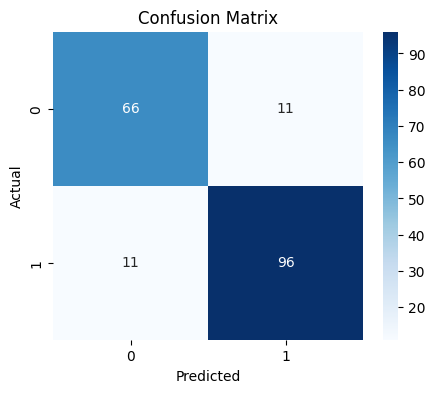

In [23]:
# -----------------------------------------------
# 8. Model Evaluation
# -----------------------------------------------
y_pred = model.predict(X_test)

print("\n✅ Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

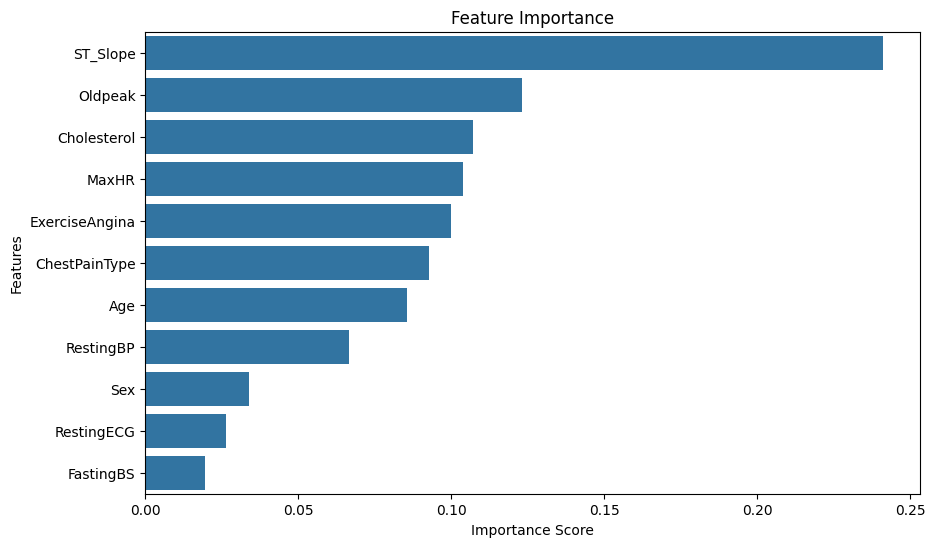

In [24]:

# 10. Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [26]:

# 9. Conclusion

print("""
📘 Conclusion:
- The Random Forest model achieved good predictive accuracy on this dataset.
- Important factors influencing heart disease likely include Age, Chest Pain Type, and Cholesterol.
- As we observed from the output and when we compared Age, Chest Pain Type, and Cholesterol to predict heart disease.
- Cholesterol is the most influential factor from Age and Chest Pain Type, or we can say that
  Age < Chest Pain Type < Cholesterol based on most infuantial factor in predicting heart disease in our model.
- Model can be improved by performing hyperparameter tuning (GridSearchCV) or testing other models.
""")



📘 Conclusion:
- The Random Forest model achieved good predictive accuracy on this dataset.
- Important factors influencing heart disease likely include Age, Chest Pain Type, and Cholesterol. 
- As we observed from the output and when we compared Age, Chest Pain Type, and Cholesterol to predict heart disease.
- Cholesterol is the most influential factor from Age and Chest Pain Type, or we can say that 
  Age < Chest Pain Type < Cholesterol based on most infuantial factor in predicting heart disease in our model.
- Model can be improved by performing hyperparameter tuning (GridSearchCV) or testing other models.

